In [1]:
#%matplotlib qt
%load_ext zipline

(11270, 60)
(11303, 60)


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


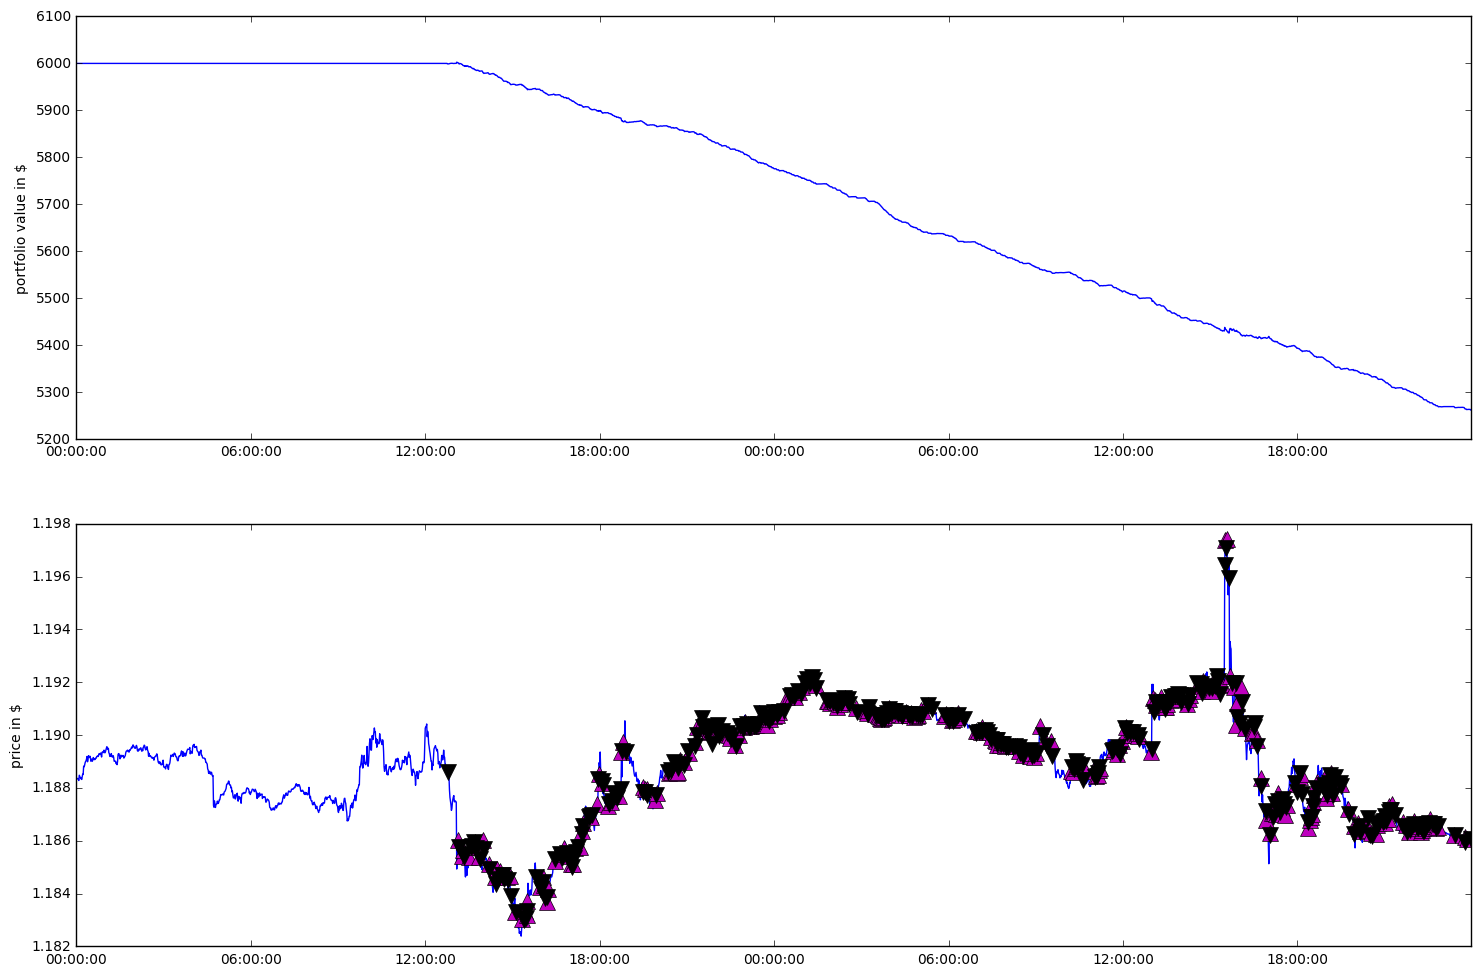

,EURUSD1,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-08-31 00:00:00+00:00,1.18831,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:01:00+00:00,1.18837,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:02:00+00:00,1.18835,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:03:00+00:00,1.18835,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:04:00+00:00,1.18834,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:05:00+00:00,1.18828,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:06:00+00:00,1.18848,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:07:00+00:00,1.18844,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:08:00+00:00,1.18839,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215
2017-08-31 00:09:00+00:00,1.18835,0.000000,0.000000,None,0.0,None,None,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.00,0.00,0.00,1,[],0.0215


In [8]:
%%zipline --start 2017-8-31 --end 2017-9-1 --bundle forex --data-frequency minute --capital-base 6000.0

import math
import numpy as np
import pandas as pd

from zipline.api import symbol, record, order, order_target, order_target_value
from zipline.utils.calendars import get_calendar

from util.ZigZag import ZigZag
from util.BuildData import BuildData4
from util.CalcReturns import CalcReturns

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt

data_lag = 61
default_volume = 1000

def initialize(context):
    context.i = 0
    context.curpos = 0
    context.curvol = 0
    context.asset = symbol('EURUSD1')
    
    context.clf = RandomForestClassifier(n_estimators = 100, criterion='entropy') # 79%
    context.clf_ready = False
    pass

def before_trading_start(context, data):    
    train = data.history(context.asset, 'price', bar_count=11520, frequency="1m").values
    
    Z = ZigZag(train, 0.001)
    R = CalcReturns(train)
        
    R = [x * 1000000 for x in R]    
    S = BuildData4(Z, R, data_lag)
    
    print S["data"].shape

    #t_count = 1024    
    #context.clf.fit(S['data'][:-t_count], S['label'][:-t_count])
    
    context.clf.fit(S['data'], S['label'])
    context.clf_ready = True
    
    #######################################################################
    
    """
    correct_count  = 0.0

    test_buy  = 0.0
    test_sell = 0.0

    correct_buy  = 0.0
    correct_sell = 0.0

    incorrect_buy  = 0.0
    incorrect_sell = 0.0

    p = context.clf.predict(S['data'][len(S['data'])-t_count:])
    c = S['label'][len(S['data'])-t_count:]

    for i in range(0, t_count):
    
        if c[i] == 1:
            test_buy += 1.0;
        elif c[i] == -1:
            test_sell += 1.0;
    
        if p[i] == c[i]:
            correct_count += 1.0
        
            if c[i] == 1:
                correct_buy += 1.0;
            elif c[i] == -1:
                correct_sell += 1.0;

        else:        
            if c[i] == 1:
                incorrect_buy += 1.0;
            elif c[i] == -1:
                incorrect_sell += 1.0;            

    print( "Accuracy:  ", (correct_count/t_count)*100.00 )

    print( "Test buy:  ", test_buy  )
    print( "Test sell: ", test_sell )

    print( "Correct buy:  ", correct_buy,  "Incorrect buy:  ", incorrect_buy,  "Accuracy: ", (correct_buy/test_buy)*100 )
    print( "Correct sell: ", correct_sell, "Incorrect sell: ", incorrect_sell, "Accuracy: ", (correct_sell/test_sell)*100 )
    
    #r = S["data"][-1] 
    #r = r.reshape(1, -1)
    
    print r    
    """
    pass

def handle_data(context, data):
    record(EURUSD1=data.current(context.asset, 'price'))
    
    if context.clf_ready is not True:
        return
        
    frame = data.history(context.asset, 'price', bar_count=data_lag, frequency="1m").values
    
    r = np.array(CalcReturns(frame))
    r = np.array([x * 1000000 for x in r])
    r = r.reshape(1, -1)
    
    p = context.clf.predict(r)    
    
    if context.curpos != p:        
        tv = p * default_volume
        dv = tv - context.curvol
        
        context.curpos = p
        context.curvol = tv;
        
        order_target(context.asset, dv)
    
    pass
    
def analyze(context, perf):    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(211)    
    ax1.plot(perf.portfolio_value.index, perf.portfolio_value.values)
    
    ax1.set_ylabel('portfolio value in $')    
    ax2 = fig.add_subplot(212)    
    
    ax2.plot(perf.EURUSD1.index, perf.EURUSD1.values)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    
    buys  = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    
    ax2.plot(buys.index.values,  perf.EURUSD1.ix[buys.index].values, '^', markersize=11, color='m')
    ax2.plot(sells.index.values, perf.EURUSD1.ix[sells.index].values,'v', markersize=11, color='k')
    
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    
    plt.gcf().set_size_inches(18, 12)
    plt.legend(loc=0)
    plt.show()
    pass